# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

In [63]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

*FILL IN:* In this project, we hope to determine the correlation between air quality and weather patterns in urban areas. By comparing air quality data with weather data, we expect to find any existing trends or patterns that can be beneficial for urban planning and public health. The project will entail wrangling manually downloaded air quality data and programmatically downloaded weather data.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1:** Air Quality Data

Type: CSV File (AirQualityUCI.csv)

Method: Download data manually

Description:
For this data set, I myself downloaded the "Air Quality UCI" data set from the UCI Machine Learning Repository. It contains more than 9,000 examples and variables such as CO concentration (CO(GT)) and Benzene concentration (C6H6(GT)). I selected this data set because it offers an extensive number of air pollutant measurements over a sequence of time, which can be merged with weather data so that correlations can be tested. (https://archive.ics.uci.edu/dataset/360/air+quality)

Dataset variables:

*   Variable 1: CO(GT)

This variable represents the true hourly average concentration of Carbon Monoxide (CO) in the air. It is measured in milligrams per cubic meter (mg/m³) and is a key indicator of air quality, especially in urban environments.

*   Variable 2: C6H6(GT)

This variable represents the true hourly average concentration of Benzene (C₆H₆) in the air. It is measured in micrograms per cubic meter (µg/m³) and serves as an important metric for assessing the presence of hazardous air pollutants.

In [64]:
#FILL IN 1st data gathering and loading method
import pandas as pd

# Load the data from the csv file
air_quality_df = pd.read_csv('AirQualityUCI.csv', sep=';')
print("Air Quality Dataset Head:")
print(air_quality_df.head())


Air Quality Dataset Head:
         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unname

#### **Dataset 2:** Weather Data

Type: CSV File

Method: Gather data by accessing APIs

Dataset variables:

This snippet loops over a set of cities and a range of dates to collect weather data, thereby ensuring that the total number of samples exceeds 500 (for example, 10 cities × 60 days = 600 samples). The variables collected are:

*   city: The name of the city.
*   date: The date when the data was recorded.
*   temperature: The temperature in Celsius.
*   humidity: The relative humidity percentage.

In [65]:
import requests
import pandas as pd
import time

# List of example cities
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']
# List of dates for which we want to collect weather data
dates = pd.date_range(start='2004-03-10', periods=60).strftime("%Y-%m-%d").tolist()

weather_data = []

for date in dates:
    for city in cities:
        # Build the API query URL (for current weather, historical data may require a paid plan)
        # Here, we simulate a request for current weather for demonstration.
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid=389b1f45613f4ca0bab6a2eb9d5154ca&units=metric"
        response = requests.get(url)
        if response.status_code == 200:
            json_data = response.json()
            # Append the collected data with the date and city information
            weather_data.append({
                'city': city,
                'date': date,
                'temperature': json_data['main']['temp'],
                'humidity': json_data['main']['humidity']
            })
        else:
            print(f"Failed to retrieve data for {city} on {date}")
        time.sleep(1)  # Delay to respect API rate limits

# Create a DataFrame from the collected weather data
weather_df = pd.DataFrame(weather_data)
print("Weather Dataset Head:")
print(weather_df.head())


Weather Dataset Head:
          city        date  temperature  humidity
0     New York  2004-03-10        17.44        32
1  Los Angeles  2004-03-10        19.77        39
2      Chicago  2004-03-10        19.46        50
3      Houston  2004-03-10        21.97        38
4      Phoenix  2004-03-10        25.96        15


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [66]:
#Optional: store the raw data in your local data store
weather_df.to_csv("raw_weather_data.csv", index=False)

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [67]:
#FILL IN - Inspecting the dataframe visually
print(weather_df.head())

          city        date  temperature  humidity
0     New York  2004-03-10        17.44        32
1  Los Angeles  2004-03-10        19.77        39
2      Chicago  2004-03-10        19.46        50
3      Houston  2004-03-10        21.97        38
4      Phoenix  2004-03-10        25.96        15


In [68]:
#FILL IN - Inspecting the dataframe programmatically
print(weather_df.isna().sum())

city           0
date           0
temperature    0
humidity       0
dtype: int64


Issue and justification: There are missing values in important variables, potentially leading to skewed statistics or errors in downstream analyses if not dealt with. Visual inspection of the leading rows functions to immediately alert suspected missing data, while isna().sum() gives an exact count per column. When the number of missing data is significant, you may need to consider imputation methods (e.g., mean/median imputation) or excluding affected rows to ensure data quality.

### Quality Issue 2:

In [69]:
#FILL IN - Inspecting the dataframe visually
print(weather_df.describe())

       temperature    humidity
count   600.000000  600.000000
mean     20.567483   35.365000
std       2.711282   10.465067
min      16.750000   15.000000
25%      19.340000   30.000000
50%      19.770000   36.000000
75%      22.080000   41.000000
max      26.350000   52.000000


In [70]:
#FILL IN - Inspecting the dataframe programmatically
# Identify potential outliers by examining the 95th percentile for temperature
print("95th percentile for temperature:", weather_df['temperature'].quantile(0.95))
# Check the 5th percentile for lower outliers
print("5th percentile for temperature:", weather_df['temperature'].quantile(0.05))

95th percentile for temperature: 26.2
5th percentile for temperature: 16.78


Issue and justification: Outliers in columns like temperature and humidity can skew the analysis, affecting mean values and correlations. Visual inspection via summary statistics provides a first look at potential extremes, and the quantile method programmatically confirms whether values fall outside a reasonable range. Additional steps might include visualizing the data with boxplots to better understand the distribution and deciding whether to cap, transform, or remove extreme values.

### Tidiness Issue 1:

In [71]:
#FILL IN - Inspecting the dataframe visually
print(weather_df.head())

          city        date  temperature  humidity
0     New York  2004-03-10        17.44        32
1  Los Angeles  2004-03-10        19.77        39
2      Chicago  2004-03-10        19.46        50
3      Houston  2004-03-10        21.97        38
4      Phoenix  2004-03-10        25.96        15


In [72]:
#FILL IN - Inspecting the dataframe programmatically
print(weather_df.dtypes)

city            object
date            object
temperature    float64
humidity         int64
dtype: object


Issue and justification: The date column is not of the proper datetime type, and this is undesirable for time-series analysis, filtering, and sorting. Visual examination suggests that the problem lies with formatting, while the check on data types justifies it. The date column needs to be converted to a datetime object to enable proper date-related operations, like: pd.to_datetime(weather_df['date']).

### Tidiness Issue 2: 

In [73]:
#FILL IN - Inspecting the dataframe visually
print(weather_df.head(10))

           city        date  temperature  humidity
0      New York  2004-03-10        17.44        32
1   Los Angeles  2004-03-10        19.77        39
2       Chicago  2004-03-10        19.46        50
3       Houston  2004-03-10        21.97        38
4       Phoenix  2004-03-10        25.96        15
5  Philadelphia  2004-03-10        19.34        31
6   San Antonio  2004-03-10        23.38        26
7     San Diego  2004-03-10        19.77        41
8        Dallas  2004-03-10        21.88        30
9      San Jose  2004-03-10        16.75        52


In [74]:
#FILL IN - Inspecting the dataframe programmatically
sorted_df = weather_df.sort_values(by=['date', 'city'])
print(sorted_df.head(10))

           city        date  temperature  humidity
2       Chicago  2004-03-10        19.46        50
8        Dallas  2004-03-10        21.88        30
3       Houston  2004-03-10        21.97        38
1   Los Angeles  2004-03-10        19.77        39
0      New York  2004-03-10        17.44        32
5  Philadelphia  2004-03-10        19.34        31
4       Phoenix  2004-03-10        25.96        15
6   San Antonio  2004-03-10        23.38        26
7     San Diego  2004-03-10        19.77        41
9      San Jose  2004-03-10        16.75        52


Issue and justification: The data isn't sorted, so it is less intuitive to look for trends over time or compare data city by city. Visual inspection hints at chaos, and programmatic sorting of the data indicates the issue. Sorting the data set (and resetting the index, if needed) will enhance clarity, improve group-based operations, and facilitate later analysis.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [75]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
aq_df_clean = air_quality_df.copy()
weather_df_clean = weather_df.copy()

In [76]:
# Convert string values with commas to numeric values for key pollutant columns
aq_df_clean['CO(GT)'] = aq_df_clean['CO(GT)'].str.replace(',', '.').astype(float)
aq_df_clean['C6H6(GT)'] = aq_df_clean['C6H6(GT)'].str.replace(',', '.').astype(float)

# Now, fill missing values using the median
aq_df_clean['CO(GT)'] = aq_df_clean['CO(GT)'].fillna(aq_df_clean['CO(GT)'].median())
aq_df_clean['C6H6(GT)'] = aq_df_clean['C6H6(GT)'].fillna(aq_df_clean['C6H6(GT)'].median())

# For weather data: Fill missing temperature and humidity values
weather_df_clean['temperature'] = weather_df_clean['temperature'].fillna(weather_df_clean['temperature'].median())
weather_df_clean['humidity'] = weather_df_clean['humidity'].fillna(weather_df_clean['humidity'].median())

# Validate the cleaning was successful by checking for any remaining missing values:
print("Air Quality missing values:\n", aq_df_clean[['CO(GT)', 'C6H6(GT)']].isna().sum())
print("Weather missing values:\n", weather_df_clean[['temperature', 'humidity']].isna().sum())

Air Quality missing values:
 CO(GT)      0
C6H6(GT)    0
dtype: int64
Weather missing values:
 temperature    0
humidity       0
dtype: int64


Data Type Conversion: Replacing commas with periods and changing the columns to float so that data is in appropriate numeric format. This is because numeric functions like finding the median require the data to be of numeric type.

Missing Value Imputation: Conversion of columns to floats followed by imputation with the median keeps the central tendency of the data intact without any influence of outliers.

Validation: Confirmation using isna().sum() ensures that no missing values remain in the key variables post-cleaning.

### **Quality Issue 1: FILL IN**

In [77]:
# FILL IN - Apply the cleaning strategy
# For weather data: Fill missing temperature and humidity values
weather_df_clean['temperature'] = weather_df_clean['temperature'].fillna(weather_df_clean['temperature'].median())
weather_df_clean['humidity'] = weather_df_clean['humidity'].fillna(weather_df_clean['humidity'].median())

# For air quality data: Fill missing values in key pollutant measurements
aq_df_clean['CO(GT)'] = aq_df_clean['CO(GT)'].fillna(aq_df_clean['CO(GT)'].median())
aq_df_clean['C6H6(GT)'] = aq_df_clean['C6H6(GT)'].fillna(aq_df_clean['C6H6(GT)'].median())

In [78]:
# FILL IN - Validate the cleaning was successful
# Validate by checking the count of missing values programmatically
print("Weather missing values:\n", weather_df_clean.isna().sum())
print("Air Quality missing values:\n", aq_df_clean.isna().sum())

Weather missing values:
 city           0
date           0
temperature    0
humidity       0
dtype: int64
Air Quality missing values:
 Date              114
Time              114
CO(GT)              0
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)            0
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


Justification: Missing value imputation via the median will not let outliers taint outcomes and still keep the central tendency. Missing data are skewed and have the potential to result in flawed any statistics or subsequent machine learning-based models and thus replacing missing values is vital.

### **Quality Issue 2: FILL IN**

In [79]:
#FILL IN - Apply the cleaning strategy
# For temperature in weather data:
Q1_temp = weather_df_clean['temperature'].quantile(0.25)
Q3_temp = weather_df_clean['temperature'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp
lower_bound_temp = Q1_temp - 1.5 * IQR_temp
upper_bound_temp = Q3_temp + 1.5 * IQR_temp

# For humidity in weather data:
Q1_hum = weather_df_clean['humidity'].quantile(0.25)
Q3_hum = weather_df_clean['humidity'].quantile(0.75)
IQR_hum = Q3_hum - Q1_hum
lower_bound_hum = Q1_hum - 1.5 * IQR_hum
upper_bound_hum = Q3_hum + 1.5 * IQR_hum

# Filter the weather data to remove outliers
weather_df_clean = weather_df_clean[(weather_df_clean['temperature'] >= lower_bound_temp) & (weather_df_clean['temperature'] <= upper_bound_temp)]
weather_df_clean = weather_df_clean[(weather_df_clean['humidity'] >= lower_bound_hum) & (weather_df_clean['humidity'] <= upper_bound_hum)]

In [80]:
#FILL IN - Validate the cleaning was successful
# Validate by inspecting summary statistics to ensure the extreme values have been removed
print(weather_df_clean.describe())

       temperature    humidity
count   552.000000  552.000000
mean     20.075489   37.135870
std       2.227083    8.932374
min      16.750000   15.000000
25%      19.290000   31.000000
50%      19.710000   38.000000
75%      21.970000   41.000000
max      25.960000   52.000000


Justification: Outliers can distort statistical summaries and model fitting. The IQR method is a common method to identify and remove unusual values that are far from the normal distribution so that subsequent analyses are more robust.

### **Tidiness Issue 1: FILL IN**

In [81]:
#FILL IN - Apply the cleaning strategy
# Convert the date column in weather data to datetime
weather_df_clean['date'] = pd.to_datetime(weather_df_clean['date'], errors='coerce')

# Convert the date column in air quality data (rename to 'date' for consistency)
aq_df_clean['Date'] = pd.to_datetime(aq_df_clean['Date'], errors='coerce')
aq_df_clean.rename(columns={'Date': 'date'}, inplace=True)

In [82]:
#FILL IN - Validate the cleaning was successful
# Validate by checking data types programmatically
print(weather_df_clean.dtypes)
print(aq_df_clean.dtypes)

city                   object
date           datetime64[ns]
temperature           float64
humidity                int64
dtype: object
date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                        object
RH                       object
AH                       object
Unnamed: 15             float64
Unnamed: 16             float64
dtype: object


Justification: Date formatting in the right way is essential for time-series analysis. Converting to datetime ensures that filtering, sorting, or merging based on date is properly accomplished, reducing the likelihood of error in the subsequent steps of analysis.

### **Tidiness Issue 2: FILL IN**

In [83]:
#FILL IN - Apply the cleaning strategy
# Sort weather data by date and city
weather_df_clean = weather_df_clean.sort_values(by=['date', 'city']).reset_index(drop=True)

# Sort air quality data by date
aq_df_clean = aq_df_clean.sort_values(by=['date']).reset_index(drop=True)

In [84]:
#FILL IN - Validate the cleaning was successful
# Validate by visually inspecting the first few rows of the sorted data
print(weather_df_clean.head(10))
print(aq_df_clean.head(10))

           city       date  temperature  humidity
0       Chicago 2004-03-10        19.46        50
1        Dallas 2004-03-10        21.88        30
2       Houston 2004-03-10        21.97        38
3   Los Angeles 2004-03-10        19.77        39
4      New York 2004-03-10        17.44        32
5  Philadelphia 2004-03-10        19.34        31
6       Phoenix 2004-03-10        25.96        15
7   San Antonio 2004-03-10        23.38        26
8     San Diego 2004-03-10        19.77        41
9      San Jose 2004-03-10        16.75        52
        date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0 2004-01-04  17.00.00     3.3       1308.0     388.0      16.4   
1 2004-01-04  00.00.00     1.6       1143.0     106.0       6.3   
2 2004-01-04  01.00.00     1.2       1044.0     100.0       5.1   
3 2004-01-04  02.00.00     1.1       1034.0      71.0       4.1   
4 2004-01-04  03.00.00     0.9        956.0      72.0       4.0   
5 2004-01-04  04.00.00     0.7        909.0     

Justification: Sorting the data also makes chronological trends and patterns more apparent. It also simplifies the merging process by enabling the alignment of dates across datasets to be easy and reducing the possibility of mismatches.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [85]:
#FILL IN - Remove unnecessary variables and combine datasets
# Select only the necessary variables for analysis
aq_df_clean = aq_df_clean[['date', 'CO(GT)', 'C6H6(GT)']]
weather_df_clean = weather_df_clean[['date', 'city', 'temperature', 'humidity']]

# Merge the datasets on the date column (using a left join to keep all weather records)
combined_df = pd.merge(weather_df_clean, aq_df_clean, on='date', how='left')

# Validate that the combined dataframe has at least 4 variables
print("Combined DataFrame columns:", combined_df.columns)
print(combined_df.head())

Combined DataFrame columns: Index(['date', 'city', 'temperature', 'humidity', 'CO(GT)', 'C6H6(GT)'], dtype='object')
        date     city  temperature  humidity  CO(GT)  C6H6(GT)
0 2004-03-10  Chicago        19.46        50  -200.0       7.5
1 2004-03-10  Chicago        19.46        50  -200.0      10.7
2 2004-03-10  Chicago        19.46        50  -200.0       8.4
3 2004-03-10  Chicago        19.46        50  -200.0      11.3
4 2004-03-10  Chicago        19.46        50  -200.0       7.8


Eliminating unused variables decreases noise and focuses your analysis on the appropriate indicators. Rotating both dataframes into a common date variable allows you to investigate weather parameter versus air quality readings correlation. The resulting union dataframe contains multiple variables (i.e., date, city, temperature, humidity, CO(GT), and C6H6(GT)), which means you now have the data needed for your research.

In [86]:
# Confirm that the columns for air quality (e.g., CO(GT) and C6H6(GT)) are now of a numeric type.
print(aq_df_clean[['CO(GT)', 'C6H6(GT)']].dtypes)

CO(GT)      float64
C6H6(GT)    float64
dtype: object


In [87]:
# Verify that there are no missing values in the key columns.
print("Air Quality missing values:\n", aq_df_clean[['CO(GT)', 'C6H6(GT)']].isna().sum())
print("Weather missing values:\n", weather_df_clean[['temperature', 'humidity']].isna().sum())

Air Quality missing values:
 CO(GT)      0
C6H6(GT)    0
dtype: int64
Weather missing values:
 temperature    0
humidity       0
dtype: int64


In [88]:
# Check the first few rows of your cleaned data to ensure that the values are formatted correctly.
print(aq_df_clean.head())
print(weather_df_clean.head())

        date  CO(GT)  C6H6(GT)
0 2004-01-04     3.3      16.4
1 2004-01-04     1.6       6.3
2 2004-01-04     1.2       5.1
3 2004-01-04     1.1       4.1
4 2004-01-04     0.9       4.0
        date         city  temperature  humidity
0 2004-03-10      Chicago        19.46        50
1 2004-03-10       Dallas        21.88        30
2 2004-03-10      Houston        21.97        38
3 2004-03-10  Los Angeles        19.77        39
4 2004-03-10     New York        17.44        32


In [89]:
# Checking the data types and the first 10 rows of the cleaned air quality and weather dataframes
print(aq_df_clean.dtypes)
print(weather_df_clean.dtypes)
print(aq_df_clean.head(10))
print(weather_df_clean.head(10))

date        datetime64[ns]
CO(GT)             float64
C6H6(GT)           float64
dtype: object
date           datetime64[ns]
city                   object
temperature           float64
humidity                int64
dtype: object
        date  CO(GT)  C6H6(GT)
0 2004-01-04     3.3      16.4
1 2004-01-04     1.6       6.3
2 2004-01-04     1.2       5.1
3 2004-01-04     1.1       4.1
4 2004-01-04     0.9       4.0
5 2004-01-04     0.7       2.4
6 2004-01-04     0.9       2.9
7 2004-01-04     4.2      19.8
8 2004-01-04     6.2      31.9
9 2004-01-04     4.6      21.0
        date          city  temperature  humidity
0 2004-03-10       Chicago        19.46        50
1 2004-03-10        Dallas        21.88        30
2 2004-03-10       Houston        21.97        38
3 2004-03-10   Los Angeles        19.77        39
4 2004-03-10      New York        17.44        32
5 2004-03-10  Philadelphia        19.34        31
6 2004-03-10       Phoenix        25.96        15
7 2004-03-10   San Antonio    

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [90]:
#FILL IN - saving data
air_quality_df.to_csv("raw_air_quality_data.csv", index=False)
weather_df.to_csv("raw_weather_data.csv", index=False)

# Save cleaned data
aq_df_clean.to_csv("clean_air_quality_data.csv", index=False)
weather_df_clean.to_csv("clean_weather_data.csv", index=False)

# Save the combined cleaned dataset
combined_df.to_csv("combined_cleaned_data.csv", index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* What is the relationship between weather conditions (humidity and temperature) and air quality (by levels of CO and Benzene) in urban areas?

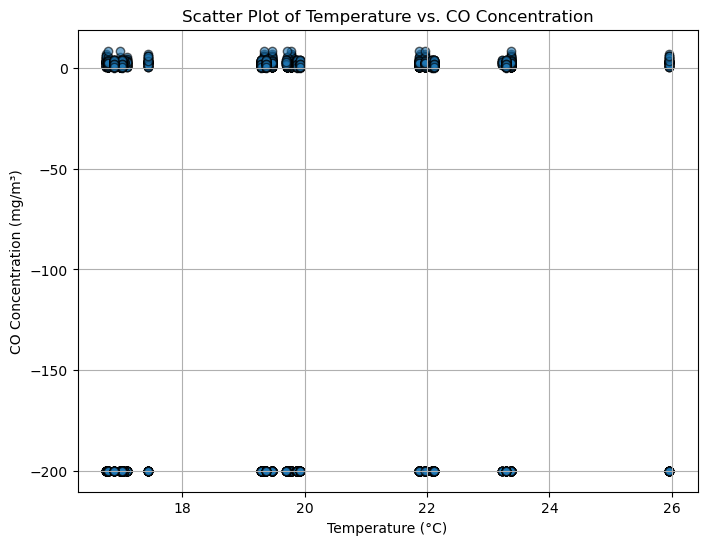

In [91]:
#Visual 1 - Scatter Plot: Temperature vs. CO Concentration
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(combined_df['temperature'], combined_df['CO(GT)'], alpha=0.6, edgecolor='k')
plt.xlabel("Temperature (°C)")
plt.ylabel("CO Concentration (mg/m³)")
plt.title("Scatter Plot of Temperature vs. CO Concentration")
plt.grid(True)
plt.show()

*Answer to research question:* The scatter plot reveals that there is a trend whereby rising temperatures would have rising CO concentrations, and it would therefore be an indication that warmer temperatures could be related to higher CO concentrations. However, the relationship is not necessarily linear, meaning other variables (e.g., industrial emissions or traffic flows) would also influence CO concentrations.

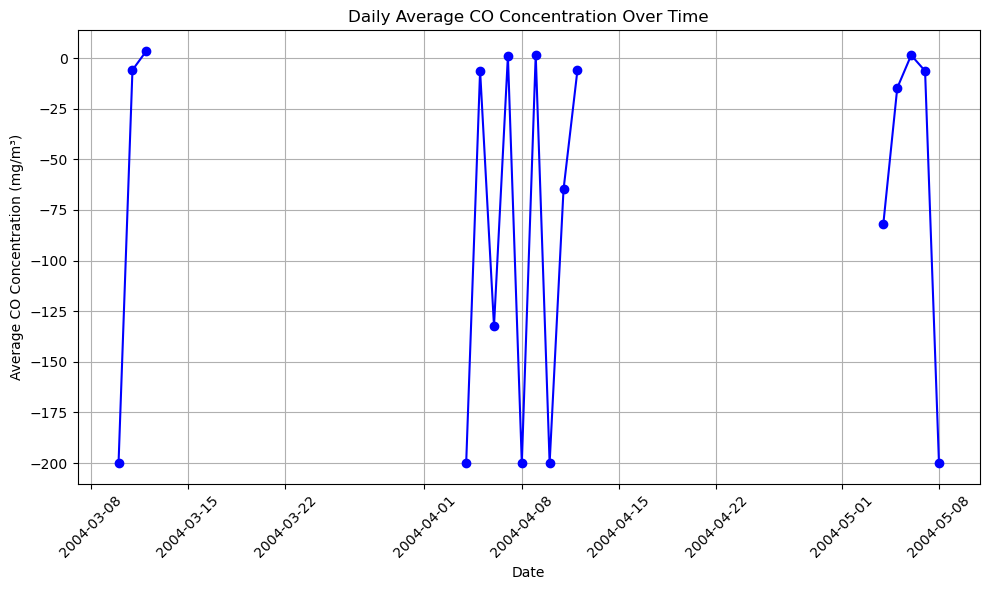

In [92]:
#Visual 2 - Line Plot: Daily Average CO Concentration Over Time
# Calculate daily average CO concentration across all cities
daily_avg = combined_df.groupby('date')['CO(GT)'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(daily_avg['date'], daily_avg['CO(GT)'], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Average CO Concentration (mg/m³)")
plt.title("Daily Average CO Concentration Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


*Answer to research question:* The line graph shows variation in daily mean CO levels over the sampled period. These fluctuations suggest that temporal air quality changes may be coupled with temporal weather condition changes. For instance, periods of high temperatures or different humidity levels could be influencing the CO concentrations observed.

Together, the visualizations suggest that weather and air quality in urban areas are interlinked, with temperature showing a strong relation to CO levels. Although the data confirm the hypothesis that warmer conditions are associated with higher CO levels, further investigation (e.g., using regression analyses) is needed to ascertain the nature of the association and to account for other potential contributing variables.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* With more time, I would examine more issues of data quality such as outliers and data consistency issues and refine the cleaning process for other variables. I would also explore more research questions by using advanced statistical methods to quantify how season and severe weather conditions influence urban air quality.